In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Importing the dataframe
df = pd.read_csv('C:/Users/jwhoj/Desktop/Capstone_1/KC_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Linear Regression

In [3]:
# Create the linear regressor: reg 
reg = LinearRegression()

In [4]:
# Convert dates to 1's and 0's to not affect data 
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'],axis=1)

In [5]:
# Train/test split 
from sklearn.model_selection import train_test_split  

In [6]:
# Create training and test sets, train data 90% and 10% test data, randomize splitting by using random state 
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [7]:
# Fit the regressor to the training data 
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Check score of data/how well it performed/predicted 
reg.score(x_test,y_test)

0.7320721056067849

Linear regression model predicted 73% This is lower than our aim of 85% so we will look at a different method. This method
is useful for weak prediction models such as this one. Next we will look at gradient booting regression. 

# Gradient Boosting 

In [9]:
# Import sklearn, create variables to define gradient boosting regressor 
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [10]:
# Fit the model to the training data set 
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# Score the accuracy of prediction on test set 
clf.score(x_test,y_test)

0.9198297131870763

Gradient boosting increased the model's predictability to 91.9%! 

# Lasso Regression

In [39]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
# Regularization I: Lasso
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(x_test,y_test)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[ 0.00000000e+00 -2.44517547e+04  5.06305414e+04  2.41343628e+02
  2.29024189e-01  1.13921813e+04  4.26109457e+05  6.50229478e+04
  2.80148065e+04  1.13331370e+05 -7.71335866e+01 -1.28619631e+02
 -3.06224361e+03  2.19671261e+01 -5.94712827e+02  5.63876066e+05
 -2.05851657e+05  1.97550564e+01 -5.85203095e-01]


C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [41]:
df = df.drop(['id', 'date'], axis=1)

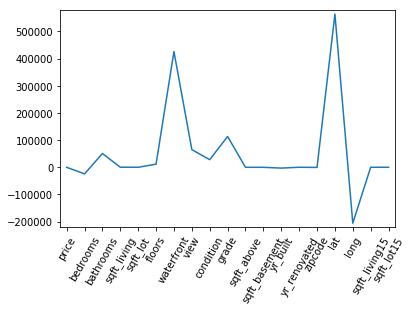

In [46]:
# Plot the coefficients
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

Lasso regression above illustrates that waterfront, lat, long, grade, and number of bathrooms are the most important 
features selected by lasso regression coefficients for predicting price. 

In [47]:
y_pred = lasso.predict(x_test)
# R2 for the training set.
lasso.score(x_train, y_train)

0.6903622097999901

In [48]:
# R2 for the testing set.
lasso.score(x_test, y_test)

0.737535796356704

In [49]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

195929.69671442322

In [ ]:
R^2 for training set is 0.69 and for the testing set is 0.74 The RMSE is $195,929

# Hyperparameter tuning with GridSearchCV

In [50]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

In [57]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-2, 2, num=20)
param_grid = {'alpha': alpha_space}
grid = GridSearchCV(lasso, param_grid, cv=5)

grid.fit(x_train, y_train)

C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-02, 1.62378e-02, 2.63665e-02, 4.28133e-02, 6.95193e-02,
       1.12884e-01, 1.83298e-01, 2.97635e-01, 4.83293e-01, 7.84760e-01,
       1.27427e+00, 2.06914e+00, 3.35982e+00, 5.45559e+00, 8.85867e+00,
       1.43845e+01, 2.33572e+01, 3.79269e+01, 6.15848e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
y_pred = grid.predict(x_test)
# R2 for the trainig set
print('The R2 for the training set is ', grid.score(x_train, y_train))

# R2 for the test set
print('The R2 for the test set is ', grid.score(x_test, y_test))

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The root mean squared error is $', rmse)
print('The best hyperparameter is ', grid.best_params_)

The R2 for the training set is  0.6957027973280536
The R2 for the test set is  0.7320221765318035
The root mean squared error is $ 197976.96117856266
The best hyperparameter is  {'alpha': 0.7847599703514611}


Hyperparameter tuning with GridSearchCV increased R^2 for train set slightly and increased RMSE slightly. It decreased
test set from 0.7375 to 0.7320

# Ridge Regression

In [59]:
# Try Ridge regression using GridSearchCV
from sklearn.linear_model import Ridge

In [60]:
# Setup the array of alphas
alpha_space = np.logspace(-4, 0, 50)

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

param_grid = {'alpha': alpha_space}
grid = GridSearchCV(ridge, param_grid, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-04, 1.20679e-04, 1.45635e-04, 1.75751e-04, 2.12095e-04,
       2.55955e-04, 3.08884e-04, 3.72759e-04, 4.49843e-04, 5.42868e-04,
       6.55129e-04, 7.90604e-04, 9.54095e-04, 1.15140e-03, 1.38950e-03,
       1.67683e-03, 2.02359e-03, 2.44205e-03, 2.94705e-03, 3.55... 3.23746e-01, 3.90694e-01,
       4.71487e-01, 5.68987e-01, 6.86649e-01, 8.28643e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
y_pred = grid.predict(x_test)
# R2 for the trainig set
print('The R2 for the training set is ', grid.score(x_train, y_train))
# R2 for the test set
print('The R2 for the testing set is ', grid.score(x_test, y_test))
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The root mean squared error is $', rmse)
print('The best hyperparameter is ', grid.best_params_)

The R2 for the training set is  0.6956962310824948
The R2 for the testing set is  0.7319857859447569
The root mean squared error is $ 197990.4030618779
The best hyperparameter is  {'alpha': 0.004291934260128779}


In [69]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, x_test, y_test, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))



In [70]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

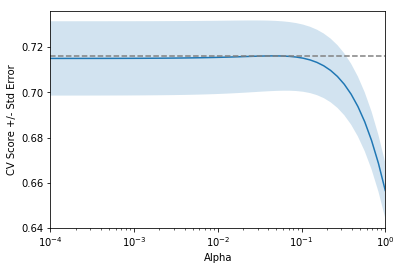

In [71]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

# ElasticNet

In [62]:
# Import ElasticNet
from sklearn.linear_model import ElasticNet

In [63]:
# Setup the array of l1_ratio
l1_space = np.linspace(0.1, 1, 5)
alpha_space = np.logspace(-3, 0, 4)

# Create a ridge regressor: ridge
elastic = ElasticNet(normalize=True)

param_grid = {'alpha': alpha_space, 'l1_ratio': l1_space}

grid = GridSearchCV(elastic, param_grid, cv=5)

In [65]:
grid.fit(x_train, y_train)

C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.001, 0.01 , 0.1  , 1.   ]), 'l1_ratio': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
y_pred = grid.predict(x_test)
# R2 for the trainig set
print('The R2 for the training set is ', grid.score(x_train, y_train))
# R2 for the test set
print('The R2 for the testing set is ', grid.score(x_test, y_test))
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The root mean squared error is $', rmse)
print('The best hyperparameter is ', grid.best_params_)

The R2 for the training set is  0.6957014061295148
The R2 for the testing set is  0.7320076250775068
The root mean squared error is $ 197982.33627557234
The best hyperparameter is  {'alpha': 1.0, 'l1_ratio': 1.0}


Very similar results across the board for ElasticNet, Ridge Regression and Lasso. Linear regression appears to have the best
results for model prediction. Lasso was interesting because it visually illustrated what features are most important in 
predicting house prices. 